In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
data = pd.read_csv('../data/cleaned/annual_increase_of_temp_by_country.csv')

In [131]:
data

,country,year,average_temperature
0,Canada,1900,0.033500
1,Canada,1901,0.118667
2,Canada,1902,0.131667
3,Canada,1903,0.602500
4,Canada,1904,-0.798667
...,...,...,...
1115,United States,2008,0.886083
1116,United States,2009,-0.185667
1117,United States,2010,-0.368500
1118,United States,2011,-0.044333


### H0: mean_annual_temperature_increase_USA = mean_annual_temperature_increase_China
- USA and China has similar GDP


In [74]:
usa = data[data['country']=='United States']
china = data[data['country']=='China']

Text(0.5, 1.0, 'China')

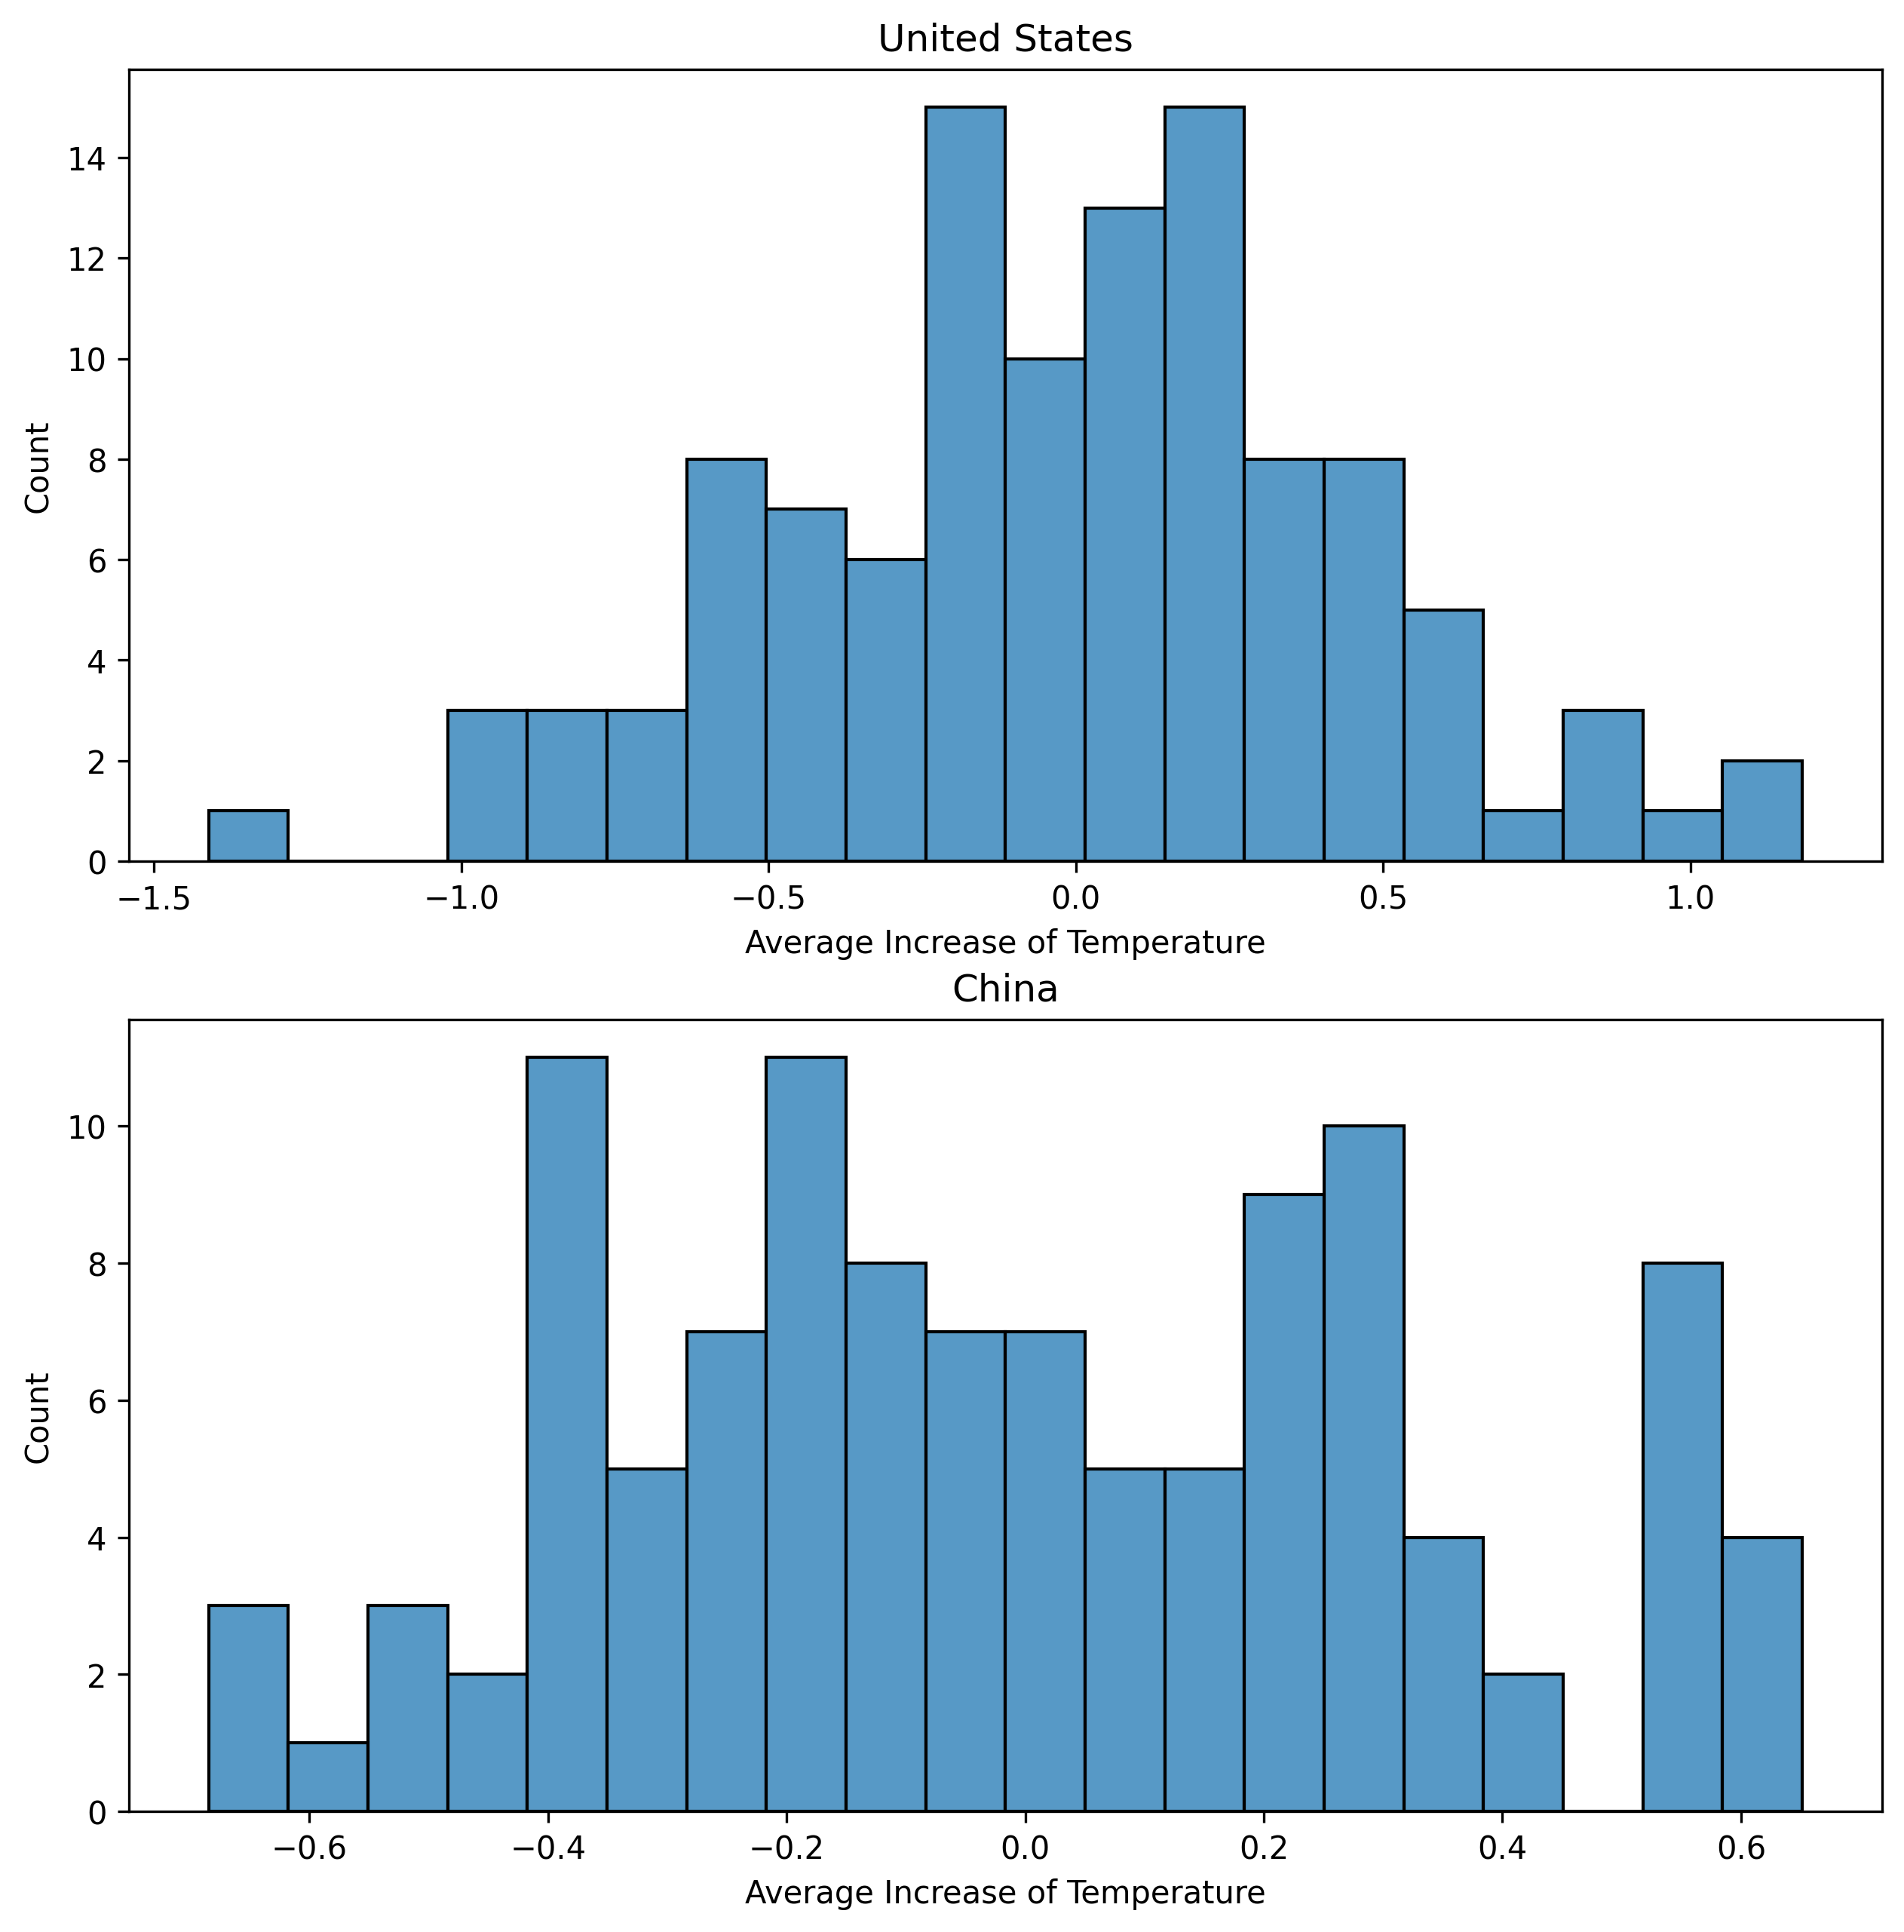

In [94]:
fig, ax = plt.subplots(2,1, figsize=(10,10), dpi=300)
sns.histplot(data=usa, x='average_temperature', ax=ax[0], bins=20)
ax[0].set_ylabel("Count") 
ax[0].set_xlabel("Average Increase of Temperature") 
ax[0].set_title("United States") 
sns.histplot(data=china, x='average_temperature', ax=ax[1], bins=20)
ax[1].set_ylabel("Count") 
ax[1].set_xlabel("Average Increase of Temperature") 
ax[1].set_title("China") 

In [76]:
usa.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
year,112.0,1955.79,32.83,1900.00,1927.75,1955.50,1984.25,2012.00
average_temperature,112.0,-0.01,0.47,-1.41,-0.33,0.02,0.27,1.18


In [77]:
china.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
year,112.0,1955.79,32.83,1900.00,1927.75,1955.50,1984.25,2012.00
average_temperature,112.0,-0.01,0.33,-0.68,-0.23,-0.03,0.25,0.65


In [78]:
X_bar_usa = usa['average_temperature'].mean()
n_usa = usa['average_temperature'].count()
s_usa = usa['average_temperature'].std()
print(X_bar_usa)
print(n_usa)
print(s_usa)

-0.011066964285714282
112
0.47291741283153227


In [79]:
X_bar_china = china['average_temperature'].mean()
n_china = china['average_temperature'].count()
s_china = china['average_temperature'].std()
print(X_bar_china)
print(n_china)
print(s_china)

-0.005651041666666666
112
0.33070091137490143


In [95]:
samples_estimates = X_bar_usa-X_bar_china
samples_estimates

-0.005415922619047616

In [96]:
#pooled variance
sp = np.sqrt((((n_usa-1)*np.power(s_usa,2))+((n_china-1)*np.power(s_china,2)))/(n_usa+n_china-2))
sp

0.4080526756090814

In [97]:
#statistics
t = samples_estimates/(sp*np.sqrt(1/10+1/13))
t

-0.031554694431970225

In [98]:
#significance level
alpha = 0.05

In [99]:
#degrees of freedom
df = n_usa + n_china -2
df

222

In [100]:
import scipy.stats
from scipy.stats import ttest_1samp

lower_critical_value, upper_critical_value = scipy.stats.t.ppf((alpha/2), df=df), scipy.stats.t.ppf(1-(alpha/2), df=df)
print("The lower critical value is {:.3f}".format(lower_critical_value))
print("The upper critical value is {:.3f}".format(upper_critical_value))

The lower critical value is -1.971
The upper critical value is 1.971


In [101]:
usa['average_temperature']

1008    0.526667
1009    0.040917
1010    0.476750
1011   -0.223417
1012   -0.201667
          ...   
1115    0.886083
1116   -0.185667
1117   -0.368500
1118   -0.044333
1119   -0.711167
Name: average_temperature, Length: 112, dtype: float64

In [102]:
stat, pval = scipy.stats.ttest_ind(usa['average_temperature'],china['average_temperature'], alternative='two-sided')

In [103]:
stat, pval

(-0.0993230927527073, 0.9209713731893843)

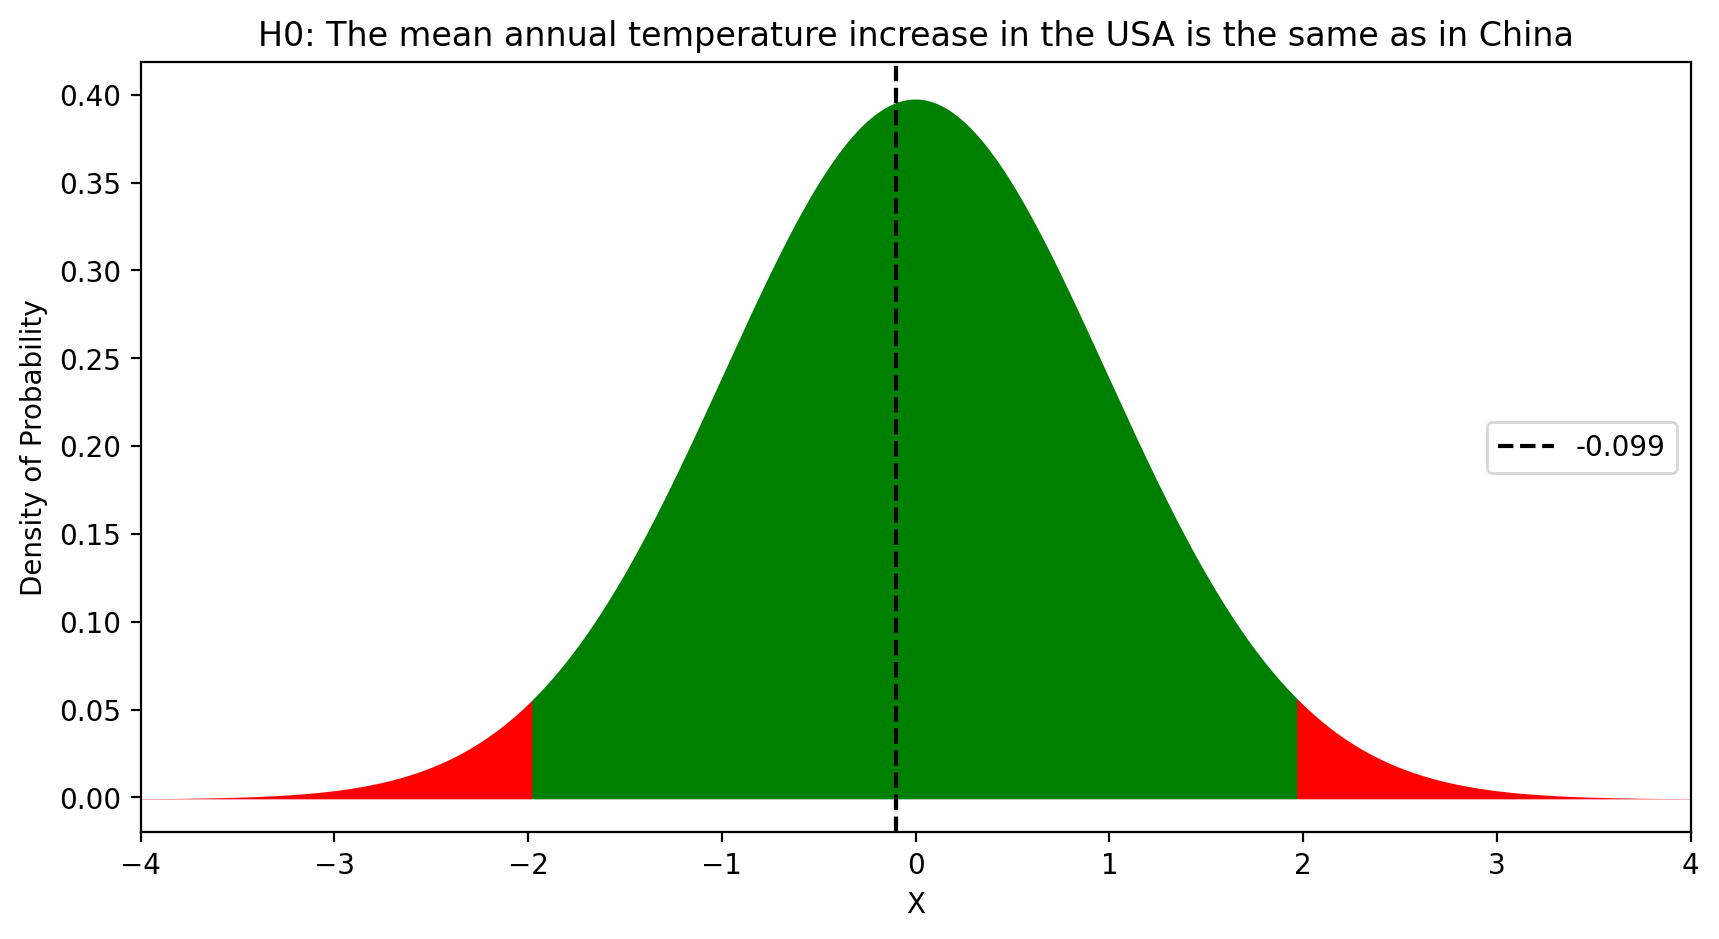

In [130]:
x = np.linspace(-4,4,1000)
y_pdf = scipy.stats.t.pdf(x,df=df)
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
ax.plot(x,y_pdf, color='white')
idx_low = (np.abs(x - lower_critical_value)).argmin()
idx_up  = (np.abs(x - upper_critical_value)).argmin()
ax.fill_between(x[:idx_low], y_pdf[:idx_low], color='red')
ax.fill_between(x[idx_low:idx_up], y_pdf[idx_low:idx_up], color='green')
ax.fill_between(x[idx_up:], y_pdf[idx_up:], color='red')
plt.axvline(x=stat, color='black', linestyle='--')
ax.set_xlim(-4,4)
ax.set_xlabel("X")
ax.set_ylabel("Density of Probability")
ax.set_title("H0: The mean annual temperature increase in the USA is the same as in China")
plt.plot([], [], color='black', linestyle='--', label=stat.round(3))
plt.legend(loc='center right')
plt.show()